In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from __future__ import print_function
import numpy as np
from tqdm import tqdm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib import cm
plt.rcParams.update({'font.size': 14, 'lines.markersize' : 4})

from scipy.optimize import curve_fit
import sys, os
import time, datetime
from datetime import timedelta
import pandas as pd
sys.path.append('/reg/d/psdm/tmo/tmox51020/results/paris/recon')
from recon_funcs import *
import h5py
from scipy.interpolate import interp1d
sys.path.append('/reg/neh/home/tdd14/modules/cart2pol/cart2pol')
import cart2pol
from cart2pol import PolarRebin
import scipy.ndimage as scimg

/reg/neh/home/tdd14/modules/CPBASEX/pbasex-Python/pbasex/gData.py:55: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gData['rBF'] is not 'custom':


Hi! I imported. 


In [6]:
runnums = [110,112,121,123,125,127]

In [52]:
ebeam.raw.ebeamUndPosX(event)

-0.010032245889306068

In [61]:
ds.runnum

121

In [60]:
dir(ds)

['__abstractmethods__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_detector_selection',
 '_check_file_exist_with_retry',
 '_close_opened_smd_files',
 '_configs',
 '_end_prometheus_client',
 '_get_configs',
 '_get_file_info_from_db',
 '_get_runinfo',
 '_setup_beginruns',
 '_setup_run',
 '_setup_run_calibconst',
 '_setup_run_files',
 '_setup_runnum_list',
 '_start_prometheus_client',
 '_start_run',
 'batch_size',
 'beginruns',
 'current_retry_no',
 'dbsuffix',
 'destination',
 'detectors',
 'dir',
 'dm',
 'dsparms',
 'exp',
 'files',
 'filter',
 'intg_det',
 'is_mpi',
 'live',
 'max_events',
 'monitor',
 'n_files',
 'p

In [ ]:
L3s = []
gds = []
runs = []
posX =[]
posY = []

for runnum in runnums:
    print(runnum)
    ds=ps.DataSource(exp = 'tmox51020', run= runnum)
    run = next(ds.runs())
    #opal1 = run.Detector('tmo_opal1') # OPAL camera looking at the holey mirror
    gmd = run.Detector("gmd") # gas intensity detector 
    timing = run.Detector('timing') # this gives access to evr codes
    ebeam = run.Detector("ebeam")
    #opalfzp = run.Detector('tmo_fzpopal') 

    if hasattr(run, 'epicsinfo'):
        epics_strs = [item[0] for item in run.epicsinfo.keys()][1:] # first one is weird
        epics_detectors = [run.Detector(item) for item in epics_strs]    

    for nevent, event in enumerate(run.events()):
        gd_i=gmd.raw.energy(event)
        gds.append(gd_i)
        L3 = ebeam.raw.ebeamL3Energy(event)
        L3s.append(L3)
        runs.append(ds.runnum)
        X = ebeam.raw.ebeamUndPosX(event)
        posX.append(X)
        Y = ebeam.raw.ebeamUndPosY(event)
        posY.append(Y)
        if len(gds)%100 == 0: print(len(gds))


110
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
112
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18

In [16]:
gds = np.array(gds)
L3s = np.array(L3s)
posX = np.array(posX)
posY = np.array(posY)
runs = np.array(runs)

In [17]:
for g in range(len(gds)):
    if type(gds[g]) == type(None): gds[g] = np.nan
    if type(posX[g]) == type(None): posX[g] = np.nan
    if type(posY[g]) == type(None): posY[g] = np.nan
    
np.min(gds)

0.0078125

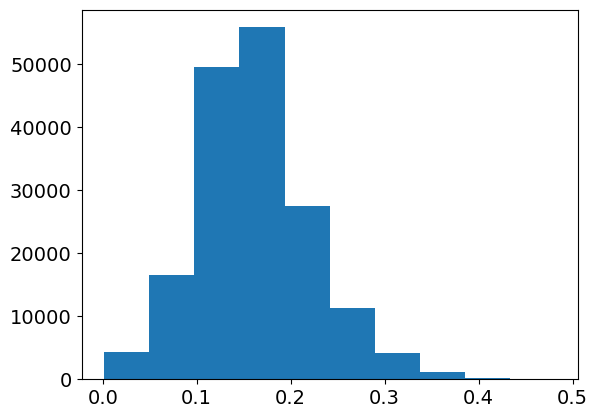

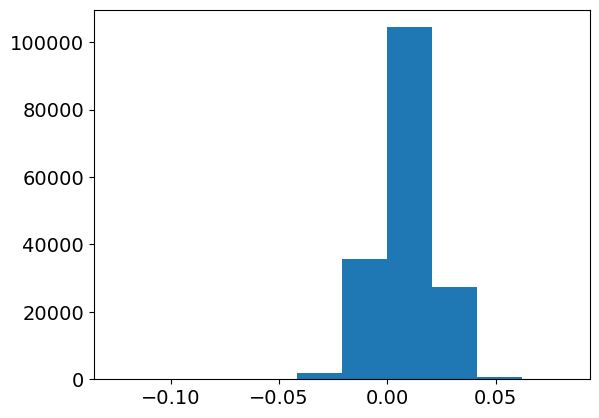

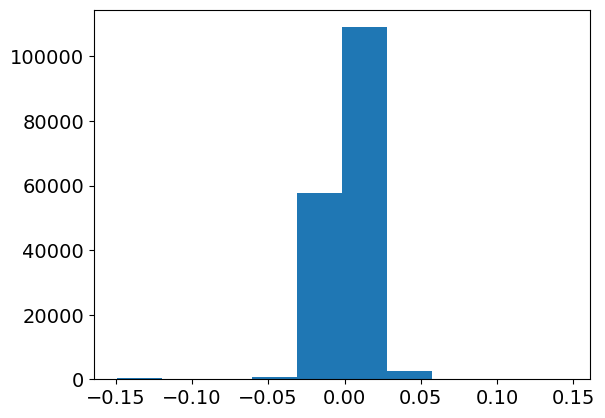

In [18]:
plt.hist(gds);
plt.show()
plt.hist(posX);
plt.show()
plt.hist(posY);
plt.show()
#plt.hist(L3s)

nan nan
-0.022470906376838684 0.014177667092896215
-0.024575423449277878 0.0065769517402225666
-0.0309959277510643 0.006408801733569516
-0.06696832180023193 0.006105933658156527
-0.042170450091362 0.00661375740015654


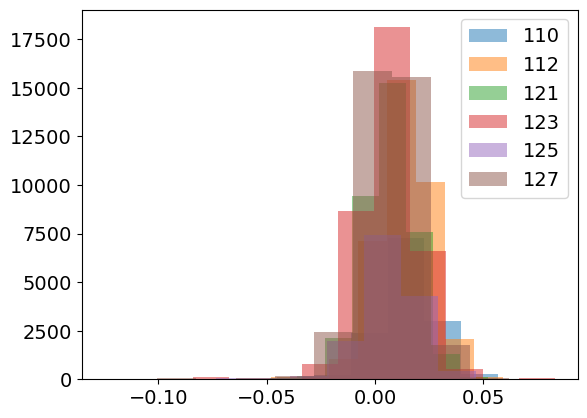

In [19]:
devX = []
meanX = []
for r in np.unique(runs):
    plt.hist(posX[runs == r], alpha = 0.5, label = r)
    print(np.percentile(posX[runs == r],.5),np.mean(posX[runs == r]))
    devX.append(np.std(posX[runs == r]))
    meanX.append(np.mean(posX[runs == r]))
plt.legend()


-0.01880563050508499 nan
-0.03556020883843303 0.005311650571540945
-0.045837853103876114 0.000752293460150802
-0.03391066566109657 0.0010325803684156927
-0.1314055621623993 0.0012381542395448154
-0.037215281277894974 0.0017535872961393056


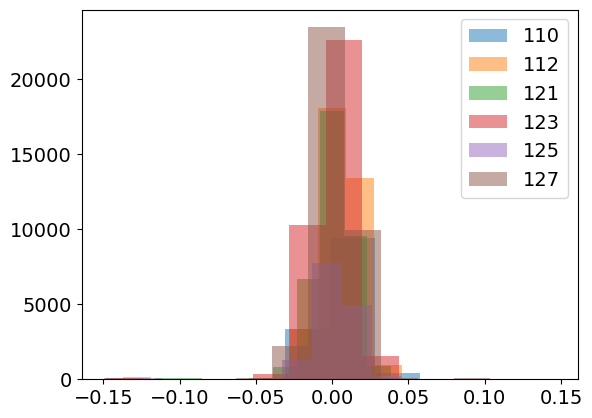

In [20]:
devY = []
meanY = []
for r in np.unique(runs):
    plt.hist(posY[runs == r], alpha = 0.5, label = r)
    print(np.percentile(posY[runs == r],.5),np.mean(posY[runs == r]))
    devY.append(np.std(posX[runs == r]))
    meanY.append(np.mean(posX[runs == r]))
plt.legend()


/tmp/ipykernel_18703/2952914888.py:3: RuntimeWarning: invalid value encountered in less_equal
  look = (runs==r)& (np.abs(posY-meanY[i])<=devY[i])& (np.abs(posX-meanX[i])<=devX[i])
/cds/sw/ds/ana/conda2/inst/envs/ps-4.5.26/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


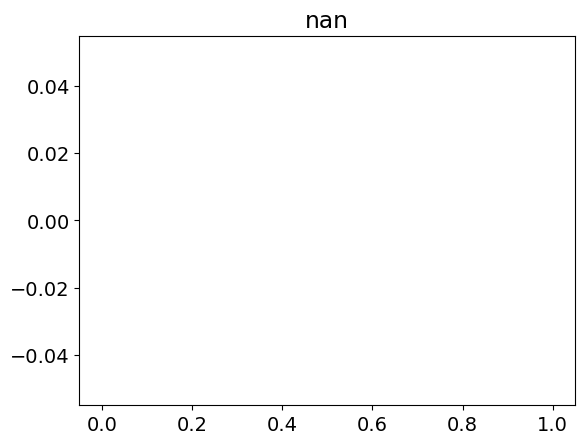

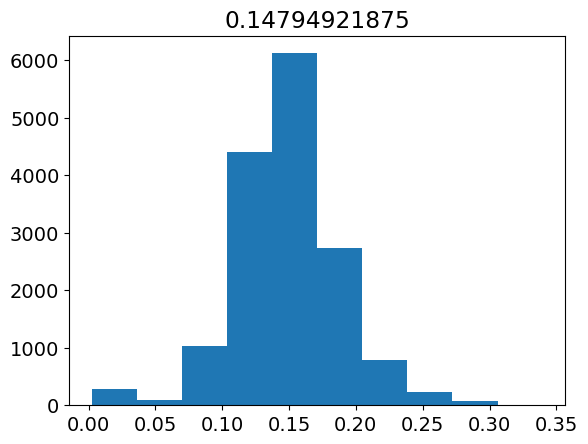

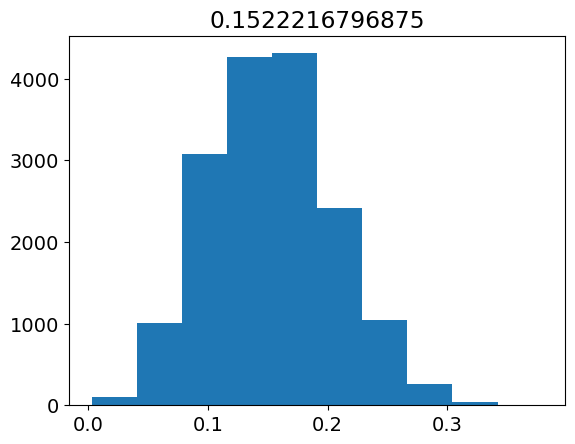

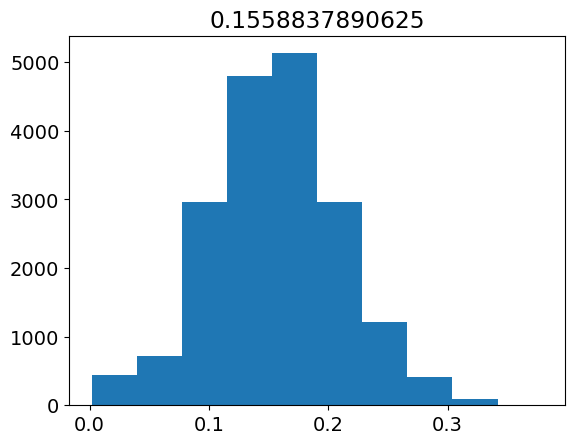

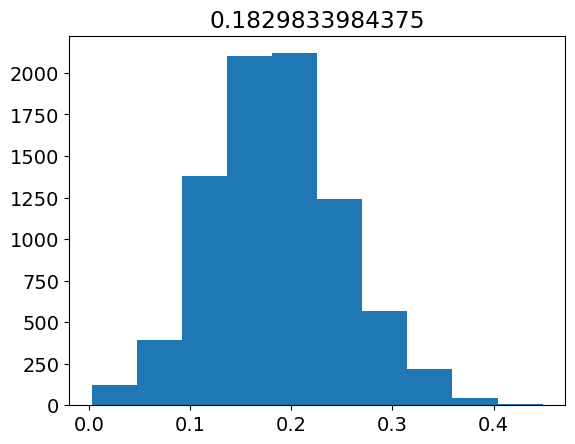

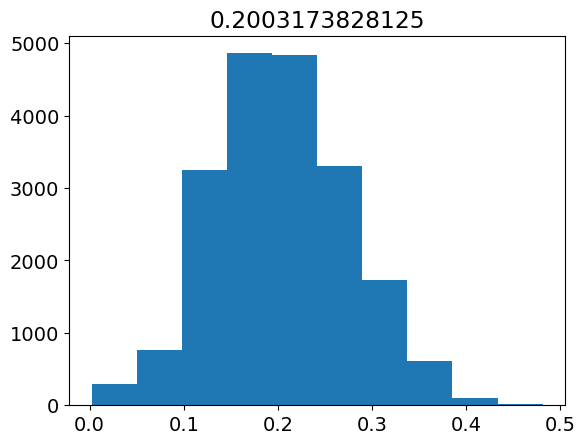

In [21]:
p50 = []
for i,r in enumerate(np.unique(runs)):
    look = (runs==r)& (np.abs(posY-meanY[i])<=devY[i])& (np.abs(posX-meanX[i])<=devX[i])
    plt.hist(gds[look])
    try:
        plt.title(np.nanpercentile(gds[look],50))
        p50.append(np.nanpercentile(gds[look],50))
    except: print(r)
    plt.show()
    

In [22]:
np.nanpercentile(gds,50)

0.156494140625

In [94]:
p50

[nan,
 0.14794921875,
 0.1522216796875,
 0.1558837890625,
 0.1829833984375,
 0.2003173828125]

In [23]:
np.nanmean(p50)

0.16787109375

In [24]:
after_retune = np.array([np.nan])
for i,r in enumerate([121,123,125,127]):
    look = (runs==r)& (np.abs(posY-meanY[i])<=devY[i])& (np.abs(posX-meanX[i])<=devX[i])
    after_retune = np.hstack((after_retune,gds[look]))

    

/tmp/ipykernel_18703/3321468977.py:3: RuntimeWarning: invalid value encountered in less_equal
  look = (runs==r)& (np.abs(posY-meanY[i])<=devY[i])& (np.abs(posX-meanX[i])<=devX[i])


In [26]:
#percentile of the min peak power reconstructed
p_guess = np.sum(after_retune<=0.202880859375)/len(after_retune)
print(p_guess)
np.nanpercentile(after_retune, p_guess*100)

0.6087885707594122


/tmp/ipykernel_18703/3581254506.py:2: RuntimeWarning: invalid value encountered in less_equal
  p_guess = np.sum(after_retune<=0.202880859375)/len(after_retune)


0.202880859375

(array([ 473., 1936., 6885., 9755., 7777., 4377., 2107.,  682.,  118.,
          15.]),
 array([0.00219727, 0.05010986, 0.09802246, 0.14593506, 0.19384766,
        0.24176025, 0.28967285, 0.33758545, 0.38549805, 0.43341064,
        0.48132324]),
 <BarContainer object of 10 artists>)

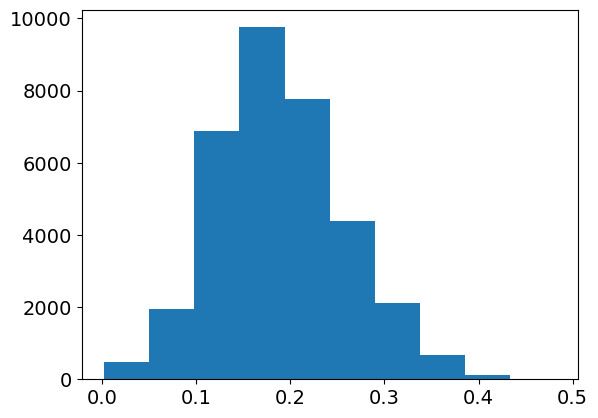

In [30]:
plt.hist(after_retune)

In [107]:
np.nanpercentile(after_retune, 50)

0.18359375

In [109]:
np.nanmean(after_retune)

0.18945831544757327

In [27]:
before_retune = np.array([np.nan])
for i,r in enumerate([110,112]):
    look = (runs==r)& (np.abs(posY-meanY[i])<=devY[i])& (np.abs(posX-meanX[i])<=devX[i])
    before_retune = np.hstack((before_retune,gds[look]))


/tmp/ipykernel_18703/2861274738.py:3: RuntimeWarning: invalid value encountered in less_equal
  look = (runs==r)& (np.abs(posY-meanY[i])<=devY[i])& (np.abs(posX-meanX[i])<=devX[i])


In [29]:
#percentile of the min peak power reconstructed
p_guess = np.sum(before_retune<=0.1300048828125)/len(before_retune)
print(p_guess)
np.nanpercentile(before_retune, p_guess*100)

0.285360903209438


/tmp/ipykernel_18703/2851809215.py:2: RuntimeWarning: invalid value encountered in less_equal
  p_guess = np.sum(before_retune<=0.1300048828125)/len(before_retune)


0.1300048828125

(array([ 291.,   97., 1027., 4404., 6117., 2730.,  783.,  224.,   68.,
          10.]),
 array([0.00244141, 0.03616943, 0.06989746, 0.10362549, 0.13735352,
        0.17108154, 0.20480957, 0.2385376 , 0.27226563, 0.30599365,
        0.33972168]),
 <BarContainer object of 10 artists>)

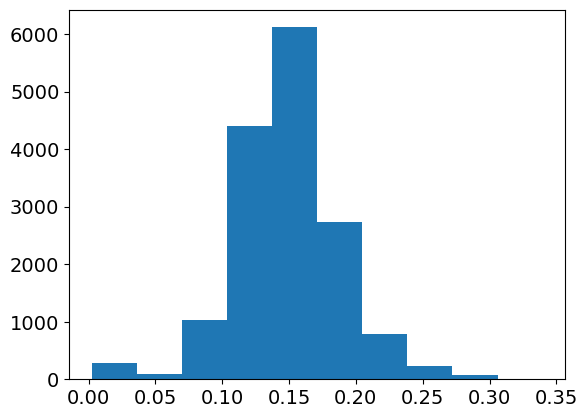

In [31]:
plt.hist(before_retune)

In [33]:
np.save('before_retune_X510', before_retune)
np.save('after_retune_X510', after_retune)

In [32]:
np.nanpercentile(before_retune, 50)

0.14794921875

In [112]:
np.nanmean(before_retune)

0.1484512097570194

In [125]:
both = np.array([np.nan])
for i,r in enumerate([110,112,121,123,125,127]):
    look = (runs==r)& (np.abs(posY-meanY[i])<=devY[i])& (np.abs(posX-meanX[i])<=devX[i])
    both = np.hstack((both,gds[look]))


In [126]:
np.nanpercentile(both, 50)

0.16259765625

In [127]:
np.nanmean(both)

0.16896124405337387

In [74]:
for r in np.unique(runs): print(r)

110
112
121
123
125
127
